In [1]:
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import mannwhitneyu
import pingouin as pg

In [2]:
results_level_c = pd.read_csv('Results_level_C.csv')

In [3]:
results_level_c.head(5)

,MNB,SVC,RandomForests,DecisionTreeClassifier,LSTM
0,77,79.00,80.00,77.89,79.00
1,77,79.56,80.00,77.00,79.23
2,77,79.89,79.89,77.56,79.56
3,77,79.00,80.43,77.34,78.00
4,77,79.00,80.56,77.00,78.23


In [4]:
results_level_c.describe()

,MNB,SVC,RandomForests,DecisionTreeClassifier,LSTM
count,10.0,10.000000,10.000000,10.000000,10.000000
mean,77.0,79.123000,80.175000,77.489000,79.048000
std,0.0,0.364602,0.254482,0.489522,0.583758
min,77.0,78.560000,79.890000,77.000000,78.000000
25%,77.0,79.000000,80.000000,77.000000,79.000000
50%,77.0,79.000000,80.000000,77.450000,79.000000
75%,77.0,79.165000,80.430000,77.890000,79.470000
max,77.0,79.890000,80.560000,78.320000,79.910000


<AxesSubplot:>

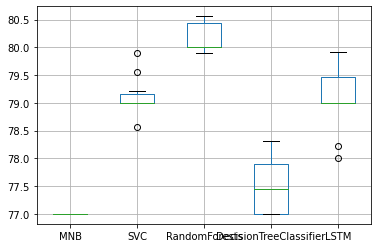

In [5]:
results_level_c.boxplot(column=['MNB','SVC','RandomForests','DecisionTreeClassifier','LSTM'])

# Hypothesis Testing

- Null hypothesis (H0) - Significant difference between two samples of accuracies.
- Alternate hypothesis (H1) - No significant difference between two samples of accuracies.
- t-test is used for the same, as the classifiers are run on the same dataset, we perform paired t-test.
- p-value is P(D|H0), so smaller the p-value, more confident we are of Null Hypothesis being false.
- If they are below siginificance level like 0.05 or 0.01 then we can reject the null hypothesis.

In [6]:
print("mean Accuracy of MNB:",results_level_c['MNB'].mean())
print("mean Accuracy of SVC:",results_level_c['SVC'].mean())
print("mean Accuracy of RandomForests:",results_level_c['RandomForests'].mean())
print("mean Accuracy of DecisionTreeClassifier:",results_level_c['DecisionTreeClassifier'].mean())
print("mean Accuracy of LSTM:",results_level_c['LSTM'].mean())

mean Accuracy of MNB: 77.0
mean Accuracy of SVC: 79.123
mean Accuracy of RandomForests: 80.175
mean Accuracy of DecisionTreeClassifier: 77.48899999999999
mean Accuracy of LSTM: 79.04799999999999


# Pairwise T-Tests and Mann-Whitney U tests

Let us perform T-Test between MNB and SVC

In [7]:
stats.ttest_rel(results_level_c.iloc[:,0], results_level_c.iloc[:,1])

Ttest_relResult(statistic=-18.413283155956723, pvalue=1.879901709852484e-08)

In [8]:
stat, p_value = mannwhitneyu(results_level_c.iloc[:,0],results_level_c.iloc[:,1])
print('Statistics=%.5f, p=%.5f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=0.00000, p=0.00005
Reject Null Hypothesis (Significant difference between two samples)


As we can see from the previous cell the mean accuracy of the SVC is 79.123 and MNB is 77, P-value being 0.000
P-value is less than the significance level of 0.05, rejecting the NULL hypothesis, SVC is performing better than MNB

Let us perform T-tests and Mann-Whitney U tests between SVC and LSTM

In [7]:
stats.ttest_rel(results_level_c.iloc[:,1], results_level_c.iloc[:,4])

Ttest_relResult(statistic=0.40236028341367186, pvalue=0.6968076983975006)

In [9]:
stat, p_value = mannwhitneyu(results_level_c.iloc[:,1],results_level_c.iloc[:,4])
print('Statistics=%.5f, p=%.5f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=49.50000, p=1.00000
Do not Reject Null Hypothesis (No significant difference between two samples)


As we can see from the previous cell the mean accuracy of the SVC is 79.123 and LSTM is 79.04, P-value being 1
P-value is greater than the significance level of 0.05, we fail to reject the NULL hypothesis, LSTM is performing same as SVC

Let us perform the T-tests and Mann-Whitney U tests on RFC and SVC

In [10]:
stats.ttest_rel(results_level_c.iloc[:,1], results_level_c.iloc[:,2])

Ttest_relResult(statistic=-6.710399245739085, pvalue=8.749517049062428e-05)

In [11]:
stat, p_value = mannwhitneyu(results_level_c.iloc[:,1],results_level_c.iloc[:,2])
print('Statistics=%.5f, p=%.5f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=0.50000, p=0.00015
Reject Null Hypothesis (Significant difference between two samples)


As we can see from the previous cell the mean accuracy of the RFC is 80.175 and SVC is 79.123, P-value being 0.00015
P-value is less than the significance level of 0.05, rejecting the NULL hypothesis, RFC is performing better than SVC

Let us perform the stats test on RFC and LSTM accuracies

In [12]:
stats.ttest_rel(results_level_c.iloc[:,2], results_level_c.iloc[:,4])

Ttest_relResult(statistic=4.492687064396085, pvalue=0.0015046900265662754)

In [13]:
stat, p_value = mannwhitneyu(results_level_c.iloc[:,2],results_level_c.iloc[:,4])
print('Statistics=%.5f, p=%.5f' % (stat, p_value))
# Level of significance
alpha = 0.05
# conclusion
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=99.00000, p=0.00021
Reject Null Hypothesis (Significant difference between two samples)


As we can see from the previous cell the mean accuracy of the RFC is 80.175 and LSTM is 79.04, P-value being 0.00021
P-value is less than the significance level of 0.05, rejecting the NULL hypothesis, RFC is performing better than LSTM

## From these tests and box plots and mean accuracies values we can see that for level C RFC is the best performing among the lot